In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pickle


learning_algo_results = pickle.load(open('learning_algo_results.pkl', 'rb'))
learning_algo_results

,task_list,epoch_list,date,nx,sigma,p_stay,min_Te,x_oracle,initialize_with_true_w,n_trials,lr,suff_stats_discount,nseeds,iters_per_trial,n_sweeps,permute_trials,true_LL,avg_learned_LL,max_learned_LL,LL_std
0,"['PRO_D', 'ANTI_D', 'PRO_M', 'ANTI_M']","['R_A', 'R_M_P', 'S', 'R_P', 'F/D', 'R_M_A']",2025-02-14 14:23:30.495482,2,0.01,0.9,3,False,False,200,OFFLINE,OFFLINE,10,1,1,False,653.724743,-34554.425102,-15424.664143,21280.002616
1,"['PRO_D', 'ANTI_D', 'PRO_M', 'ANTI_M']","['R_A', 'R_M_P', 'S', 'R_P', 'F/D', 'R_M_A']",2025-02-14 14:24:09.522208,2,0.01,0.9,3,True,False,200,OFFLINE,OFFLINE,10,1,1,False,654.417890,-32526.273922,-5162.891012,13235.864593
2,"['PRO_D', 'ANTI_D', 'PRO_M', 'ANTI_M']","['R_A', 'R_M_P', 'S', 'R_P', 'F/D', 'R_M_A']",2025-02-14 14:25:00.015484,2,0.01,0.9,3,True,False,200,OFFLINE,OFFLINE,10,1,1,False,654.417890,-32526.273919,-5162.891012,13235.864591
3,"['PRO_D', 'ANTI_D', 'PRO_M', 'ANTI_M']","['R_A', 'R_M_P', 'S', 'R_P', 'F/D', 'R_M_A']",2025-02-14 14:29:09.154596,2,0.01,0.9,3,False,False,200,0.1,0.99,10,1,1,False,653.724743,-44873.161670,-26427.906412,9082.159322
4,"['PRO_D', 'ANTI_D', 'PRO_M', 'ANTI_M']","['R_A', 'R_M_P', 'S', 'R_P', 'F/D', 'R_M_A']",2025-02-14 14:31:18.952851,2,0.01,0.9,3,False,False,200,0.05,0.99,10,1,1,False,653.724743,-44407.642164,-23197.784469,10116.718839
5,"['PRO_D', 'ANTI_D', 'PRO_M', 'ANTI_M']","['R_A', 'R_M_P', 'S', 'R_P', 'F/D', 'R_M_A']",2025-02-14 14:36:27.409794,2,0.01,0.9,3,False,False,200,0.05,1.0,10,1,1,False,653.724743,-44626.090806,-25804.557186,9086.277239
6,"['PRO_D', 'ANTI_D', 'PRO_M', 'ANTI_M']","['R_A', 'R_M_P', 'S', 'R_P', 'F/D', 'R_M_A']",2025-02-14 14:37:41.750215,2,0.01,0.9,3,False,False,200,0.05,1.0,10,1,1,True,653.724743,-43898.385944,-24851.834834,12582.825070
7,"['PRO_D', 'ANTI_D', 'PRO_M', 'ANTI_M']","['R_A', 'R_M_P', 'S', 'R_P', 'F/D', 'R_M_A']",2025-02-14 14:38:55.503520,2,0.01,0.9,3,True,False,200,0.05,1.0,10,1,1,True,654.417890,-32902.016747,-19596.199263,8266.393659
8,"['PRO_D', 'ANTI_D', 'PRO_M', 'ANTI_M']","['R_A', 'R_M_P', 'S', 'R_P', 'F/D', 'R_M_A']",2025-02-14 14:40:19.830492,2,0.01,0.9,3,True,False,200,0.05,1.0,10,1,1,False,654.417890,-32912.965938,-23974.864738,8704.903575


Text(0.5, 1.0, 'with random params: -334k; ground truth:600')

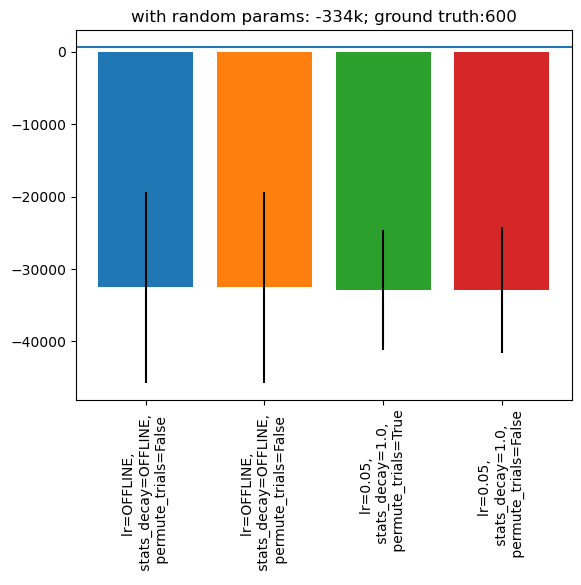

In [13]:

plt.figure()
plt.axhline(663, label='ground truth')
labels = []
x_loc = 0
for i in range(len(learning_algo_results)):
    # if i not in [0, 3, 4, 5, 7, 8]:
    #     continue
    row = learning_algo_results.loc[i]
    if row['x_oracle'] == False:
        continue
    plt.bar(x_loc, row['avg_learned_LL'])
    plt.errorbar(x_loc, row['avg_learned_LL'], yerr=row['LL_std'], color='k')
    x_loc += 1
    labels.append(f"lr={row['lr']}, \n stats_decay={row['suff_stats_discount']}, \n permute_trials={row['permute_trials']}")
plt.xticks(range(len(labels)), labels, rotation=90)
plt.title('with random params: -334k; ground truth:600')